In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=33304151a3b71e75b3669711447a8267


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | clyde river
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | zyryanskoye
Processing Record 9 of Set 1 | negombo
Processing Record 10 of Set 1 | kihei
Processing Record 11 of Set 1 | phuthaditjhaba
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | saint-pierre
Processing Record 14 of Set 1 | sobolevo
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | galle
Processing Record 17 of Set 1 | visnes
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | souillac
Processing Record 20 of Set 1 | portland
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | atuona
Proces

Processing Record 38 of Set 4 | champerico
Processing Record 39 of Set 4 | emborion
Processing Record 40 of Set 4 | innisfail
Processing Record 41 of Set 4 | salina cruz
Processing Record 42 of Set 4 | amahai
Processing Record 43 of Set 4 | lethem
Processing Record 44 of Set 4 | iralaya
Processing Record 45 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 46 of Set 4 | sorvag
City not found. Skipping...
Processing Record 47 of Set 4 | kalmar
Processing Record 48 of Set 4 | faanui
Processing Record 49 of Set 4 | flinders
Processing Record 50 of Set 4 | pevek
Processing Record 1 of Set 5 | lazaro cardenas
Processing Record 2 of Set 5 | aklavik
Processing Record 3 of Set 5 | los llanos de aridane
Processing Record 4 of Set 5 | yatou
Processing Record 5 of Set 5 | la ronge
Processing Record 6 of Set 5 | el alto
Processing Record 7 of Set 5 | atar
Processing Record 8 of Set 5 | scarborough
Processing Record 9 of Set 5 | carutapera
Processing Record 10 of Set 5 | stroud
P

Processing Record 26 of Set 8 | valparaiso
Processing Record 27 of Set 8 | port hedland
Processing Record 28 of Set 8 | kerrobert
Processing Record 29 of Set 8 | byron bay
Processing Record 30 of Set 8 | port blair
Processing Record 31 of Set 8 | sarangani
Processing Record 32 of Set 8 | trencin
Processing Record 33 of Set 8 | karaul
City not found. Skipping...
Processing Record 34 of Set 8 | denpasar
Processing Record 35 of Set 8 | monywa
Processing Record 36 of Set 8 | luang prabang
Processing Record 37 of Set 8 | horsham
Processing Record 38 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 39 of Set 8 | benguela
Processing Record 40 of Set 8 | puro
Processing Record 41 of Set 8 | xuddur
Processing Record 42 of Set 8 | nioro
Processing Record 43 of Set 8 | moron
Processing Record 44 of Set 8 | egvekinot
Processing Record 45 of Set 8 | yarkovo
Processing Record 46 of Set 8 | sunbury
Processing Record 47 of Set 8 | agadez
Processing Record 48 of Set 8 | canon city

Processing Record 11 of Set 12 | cumbitara
Processing Record 12 of Set 12 | suez
Processing Record 13 of Set 12 | gornopravdinsk
Processing Record 14 of Set 12 | den helder
Processing Record 15 of Set 12 | pathein
Processing Record 16 of Set 12 | zaterechnyy
Processing Record 17 of Set 12 | guamuchil
Processing Record 18 of Set 12 | sao filipe
Processing Record 19 of Set 12 | fernandopolis
Processing Record 20 of Set 12 | lopukhiv
Processing Record 21 of Set 12 | tadine
Processing Record 22 of Set 12 | churapcha
Processing Record 23 of Set 12 | mount isa
Processing Record 24 of Set 12 | grand gaube
Processing Record 25 of Set 12 | chapais
Processing Record 26 of Set 12 | kijang
Processing Record 27 of Set 12 | barbar
City not found. Skipping...
Processing Record 28 of Set 12 | klyuchi
Processing Record 29 of Set 12 | linjiang
Processing Record 30 of Set 12 | talakan
Processing Record 31 of Set 12 | meyungs
City not found. Skipping...
Processing Record 32 of Set 12 | zhigansk
Processing

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,73.58,79,85,6.49,PF,2020-08-01 17:54:29
1,Busselton,-33.65,115.33,50.00,81,80,1.77,AU,2020-08-01 17:54:30
2,Esperance,-33.87,121.90,46.40,87,81,10.29,AU,2020-08-01 17:50:31
3,Hilo,19.73,-155.09,72.00,88,90,3.36,US,2020-08-01 17:50:09
4,Butaritari,3.07,172.79,82.99,79,59,14.56,KI,2020-08-01 17:54:30
5,Clyde River,70.47,-68.59,46.40,87,90,5.82,CA,2020-08-01 17:51:23
6,Lebu,-37.62,-73.65,53.47,92,97,10.02,CL,2020-08-01 17:54:30
7,Zyryanskoye,56.83,86.63,56.21,90,5,5.37,RU,2020-08-01 17:54:31
8,Negombo,7.21,79.84,82.40,83,75,12.75,LK,2020-08-01 17:54:31
9,Kihei,20.79,-156.47,77.00,65,20,6.93,US,2020-08-01 17:54:31


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-08-01 17:54:29,-23.12,-134.97,73.58,79,85,6.49
1,Busselton,AU,2020-08-01 17:54:30,-33.65,115.33,50.00,81,80,1.77
2,Esperance,AU,2020-08-01 17:50:31,-33.87,121.90,46.40,87,81,10.29
3,Hilo,US,2020-08-01 17:50:09,19.73,-155.09,72.00,88,90,3.36
4,Butaritari,KI,2020-08-01 17:54:30,3.07,172.79,82.99,79,59,14.56
5,Clyde River,CA,2020-08-01 17:51:23,70.47,-68.59,46.40,87,90,5.82
6,Lebu,CL,2020-08-01 17:54:30,-37.62,-73.65,53.47,92,97,10.02
7,Zyryanskoye,RU,2020-08-01 17:54:31,56.83,86.63,56.21,90,5,5.37
8,Negombo,LK,2020-08-01 17:54:31,7.21,79.84,82.40,83,75,12.75
9,Kihei,US,2020-08-01 17:54:31,20.79,-156.47,77.00,65,20,6.93


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1596304594.3655174

In [15]:
today = time.strftime("%x")
today

'08/01/20'

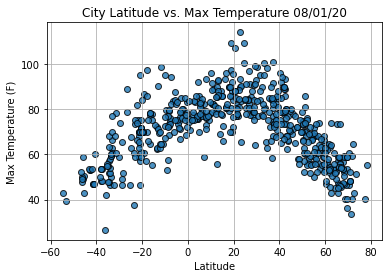

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

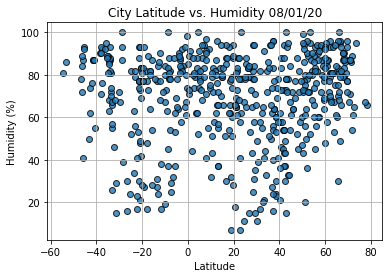

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

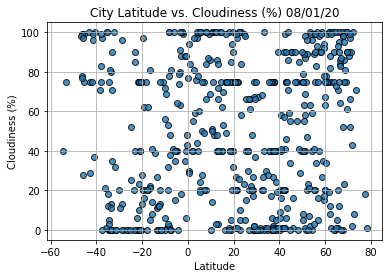

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

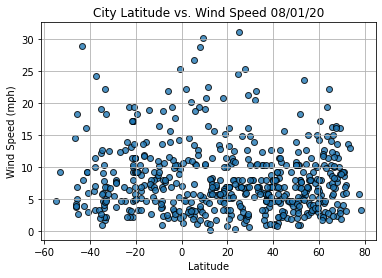

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [50]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [51]:
index13 = city_data_df.loc[13]
index13

City                     Sobolevo
Country                        RU
Date          2020-08-01 17:54:32
Lat                         54.43
Lng                          31.9
Max Temp                    55.89
Humidity                       82
Cloudiness                     96
Wind Speed                  10.49
Name: 13, dtype: object

In [52]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
550     True
551     True
552     True
553    False
554    False
Name: Lat, Length: 555, dtype: bool

In [53]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Hilo,US,2020-08-01 17:50:09,19.73,-155.09,72.00,88,90,3.36
4,Butaritari,KI,2020-08-01 17:54:30,3.07,172.79,82.99,79,59,14.56
5,Clyde River,CA,2020-08-01 17:51:23,70.47,-68.59,46.40,87,90,5.82
7,Zyryanskoye,RU,2020-08-01 17:54:31,56.83,86.63,56.21,90,5,5.37
8,Negombo,LK,2020-08-01 17:54:31,7.21,79.84,82.40,83,75,12.75
...,...,...,...,...,...,...,...,...,...
548,Waslala,NI,2020-08-01 17:56:35,13.23,-85.38,80.60,57,40,6.93
549,Santa Rosa,PH,2020-08-01 17:53:09,14.31,121.11,78.01,94,100,3.33
550,Ouadda,CF,2020-08-01 17:56:36,8.08,22.40,71.28,90,100,1.77
551,Kholm,RU,2020-08-01 17:56:36,59.27,32.85,55.89,79,17,6.20


In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

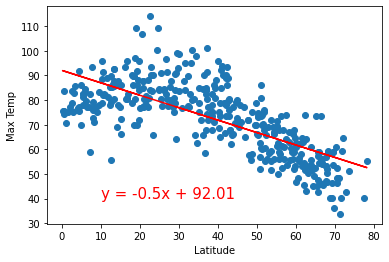

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

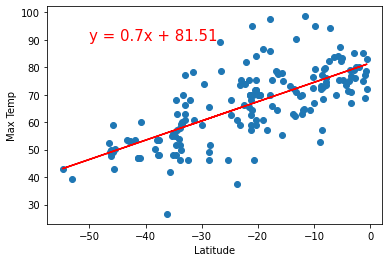

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

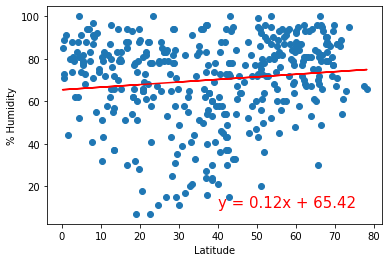

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

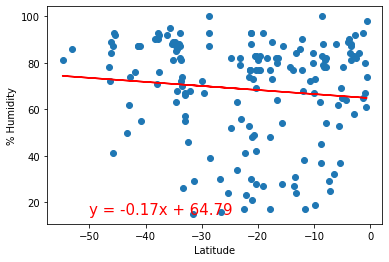

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

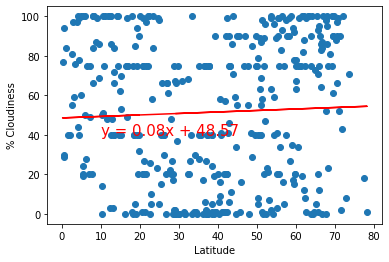

In [74]:
# Linear regression on the Nouthern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Nouthern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,40))

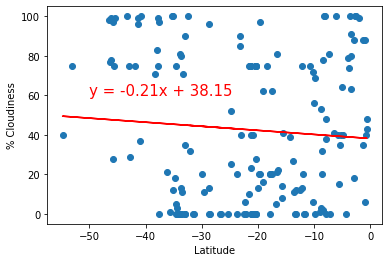

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

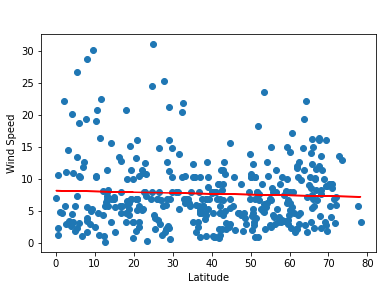

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

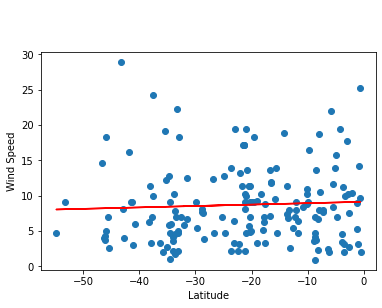

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))